In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile,QuantumRegister,ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum-computing.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

This code would show that Quantum Theory can not be used for observers who themselves use Quantum Theory.
This though experiment was proposed in 2016 by Frauchiger and Renner. It involves 4 observers to reason about the outcome of each others measurements, who in turn find their observations to be in contradiction to each other's. It is an extension of the Wigner's Friend Paradox.

The quantum Circuit for Wigner's is:

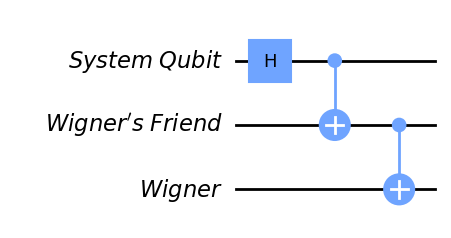

In [2]:
qr1=QuantumRegister(1,name="System Qubit")
qr2=QuantumRegister(1,name="Wigner's Friend")
qr3=QuantumRegister(1,name="Wigner")
qc=QuantumCircuit(qr1,qr2,qr3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.draw("mpl")

Modelling the CNOTs as Alice observing her qubits and preparing Bobs based on her measurement.

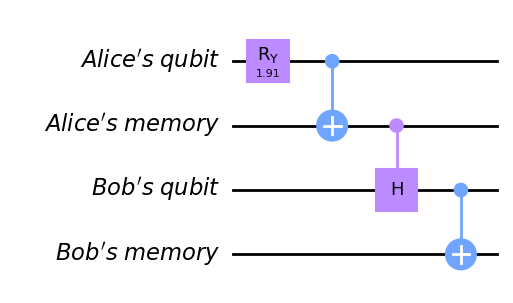

In [3]:
import numpy as np
from qiskit.circuit.library import CHGate
qr1=QuantumRegister(1,name="Alice's qubit")
qr2=QuantumRegister(1,name="Alice's memory")
qr3=QuantumRegister(1,name="Bob's qubit")
qr4=QuantumRegister(1,name="Bob's memory")
qc=QuantumCircuit(qr1,qr2,qr3,qr4)
#preparing Alice's Qubit
theta=2*np.arcsin(np.sqrt(2/3))
qc.ry(theta,0)#prepares Alice's qubit in superposition
#Alice's measurement
qc.cx(0,1)
#preparing Bob's Qubit
qc.ch(1,2)
#Bob's measurement
qc.cx(2,3)
qc.draw("mpl")

Now checking if Bob measured 1 then Alice too must have measured 1.

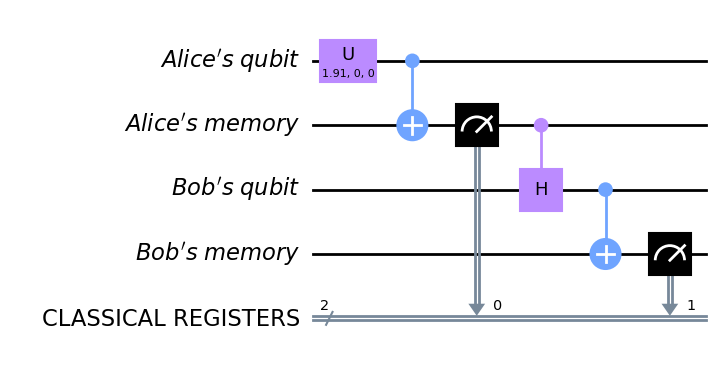

In [4]:
cr=ClassicalRegister(2,name="CLASSICAL REGISTERS")
qc1=QuantumCircuit(qr1,qr2,qr3,qr4,cr)
#preparing Alice's Qubit

#theta=2*np.arcsin(np.sqrt(2/3))
qc1.u(theta,0,0,0)#prepares Alice's qubit in superposition
#Alice's measurement
qc1.cx(0,1)
#alice's measure
qc1.measure(1,0)
#preparing Bob's Qubit
qc1.ch(1,2)
#Bob's measurement
qc1.cx(2,3)

qc1.measure(3,1)
qc1.draw("mpl")

In [5]:
from qiskit_aer import AerSimulator
backend=AerSimulator()
transpiled=transpile(qc1,backend)
results=backend.run(transpiled).result().get_counts()
print(results)

{'01': 327, '11': 325, '00': 372}


So as we can see whenever Bob measured 1 Alice did necessarily measure 1.

But now let us look at the scenario when 2 more friends enter the picture,namely Charlotte and Danny. They have complete control over Alice and Bob's Qubits, and can choose to measure them in whichever basis they want. So Charlotte is going to measure Alice's qubit in Bell Basis.(https://www.quantiki.org/wiki/bell-basis). If Charlotte's Z measurement is 01, then alice would have been n phi- state, then bob must have measured 1.

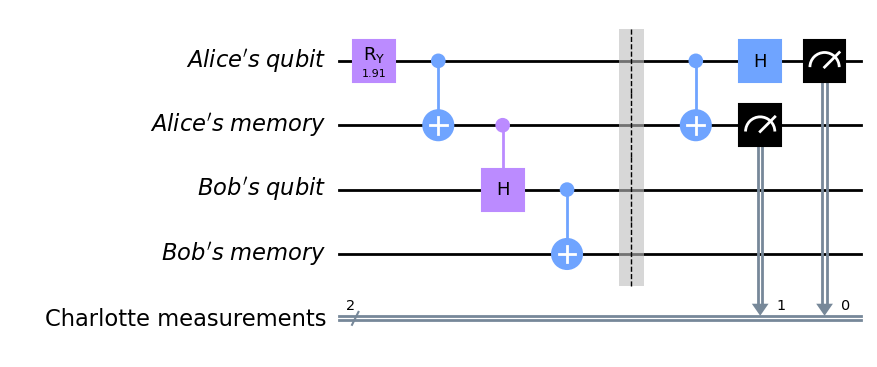

In [6]:
cr1=ClassicalRegister(2,name="Charlotte measurements")
qc.add_register(cr1)
qc.barrier()
#measurement in bell basis
qc.cx(0,1)
qc.h(0)
qc.measure(0,0)
qc.measure(1,1)
qc.draw("mpl")

Adding Measurements to Bob's Qubit

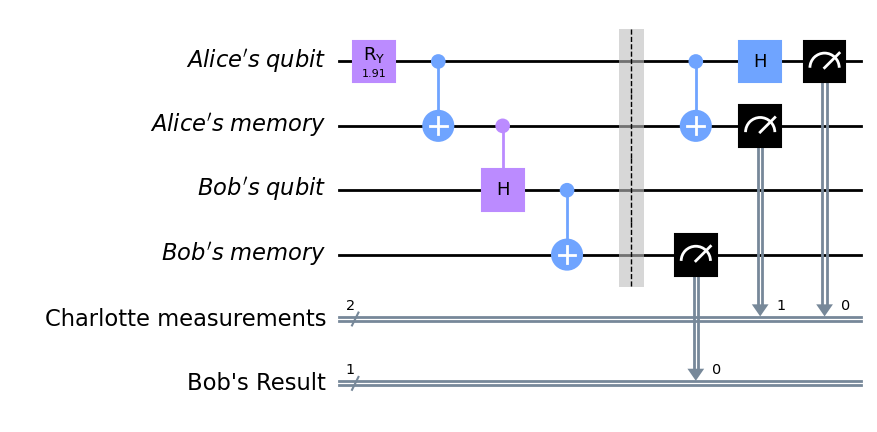

In [7]:
cr3=ClassicalRegister(1,name="Bob's Result")
qc_b=qc.copy()
qc_b.add_register(cr3)
qc_b.measure(3,2)
qc_b.draw("mpl")

In [9]:
transpiled_2=transpile(qc_b,backend)
results=backend.run(transpiled_2).result().get_counts()
print(results)

{'1 00': 153, '1 01': 195, '0 00': 676}


So indeed when Charlotte measures 10 Bob always measures 1. And by extension of the previous results,if Bob measured 1 Alice must have also measured 1.

If Bob measures his Qubit in + State,then Bob and his qubit are going to jointly enter in the phi+ state. So if Charlotte measures Alice and her qubit in the phi- state then Danny should defintely measure Bob and his qubit in the phi+ state. Tehre fore an outcome where danny and Charlotte both gets phi- should not be possible.

This time Danny is gonna measure Bob's Qubit in Bell Basis

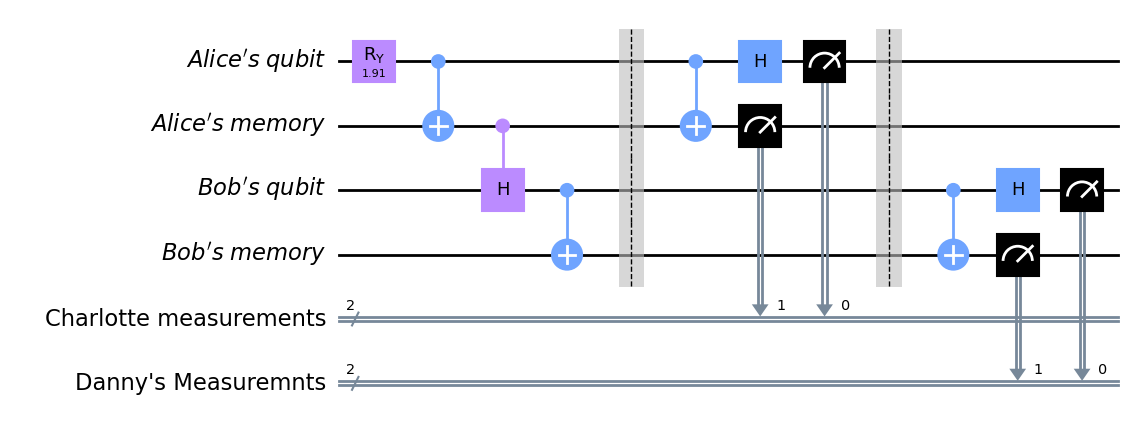

In [12]:
cr2=ClassicalRegister(2,name="Danny's Measuremnts")
qc.add_register(cr2)
qc.barrier()
#Measuring second pair of qubits in bell states
qc.cx(2,3)
qc.h(2)
qc.measure(2,2)
qc.measure(3,3)
qc.draw("mpl")


In [14]:
# measurement outcome of 00 refers to phi+ state and 01 refers to phi- state
transpiled_3=transpile(qc,backend)
results=backend.run(transpiled_3).result().get_counts()
print(results)

{'01 00': 100, '00 01': 79, '01 01': 87, '00 00': 758}


Contrary to what was expected Danny does measure "01 01" that is 2 phi- states that is both Danny and Charlotte measured 01 state, that he shouldn't have. And hence we arrived to another paradox in the quantum world of paradoxes. 

One way to resolve this paradox is as follows.
The basis in which Alice measured her qubit wws computational basis but the basis in which Charlotte did it is the bell basis. Now according to Heisenberg's principle, the way a quantum system can not have a definite state in X and Z basis, Alice's lab can not have definite state in Computational as well as Bell basis.
So, it would be fine for Charlotte to reason about Bob's past outcome and Bob to reason about Alice's past measurement outcome,as these happen in Compatible Bases. But Charlotte can not use Bob's Conclusion about Alice's outcome because that conclusion involves a measurement basis that is incompatible with Charlotte's basis. Once we the chaining together of Bob And Charlotte's deductions, there is no reason Danny cannot measure 2 phi- states.